In [134]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(17)

In [135]:
def sign(y):
  temp = np.zeros(len(y))
  for i in range(len(y)):
   if y[i]>=0:
     temp[i]=1
   else:
     temp[i]=-1
  return temp

x_data = np.arange(0, 2*np.pi, 0.1)
x_data_test = np.arange(0.05, 2*np.pi, 0.1)


y_data_sin = np.sin(x_data*2)
y_data_sin_test = np.sin(x_data_test*2)


y_data_square = sign(y_data_sin)
y_data_square_test =sign(y_data_sin_test)

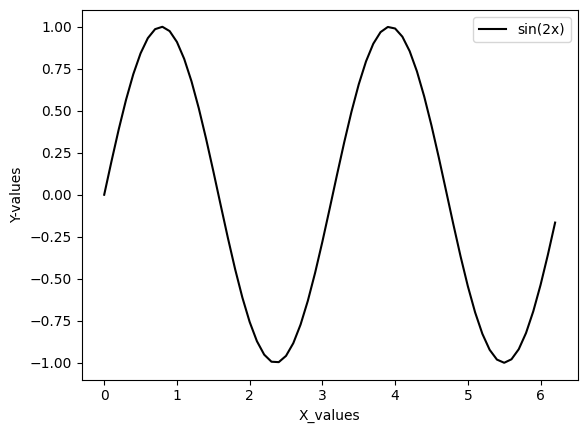

In [136]:
#plot sin(2x)
plt.plot(x_data ,y_data_sin, color="black",label="sin(2x)")
plt.xlabel("X_values")
plt.ylabel("Y-values")

plt.legend()
plt.show()

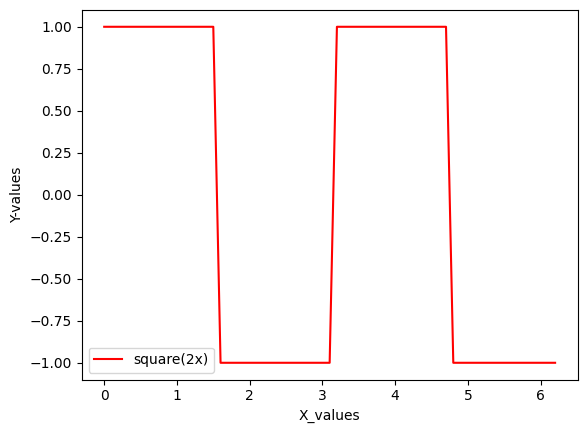

In [137]:
plt.plot(x_data ,y_data_square, color="red",label="square(2x)")
plt.xlabel("X_values")
plt.ylabel("Y-values")
plt.legend()
plt.show()

In [138]:
#Functions  and constants
def calculate_error(y_p, y):
    return np.divide(np.sum(np.square(y_p-y)), len(y))



def threshold_node(errors):
 n_1= np.inf
 n_01 = np.inf
 n_001 = np.inf
 n_zero = np.inf

 for i in range(len(errors)):
  if n_1==np.inf and errors[i]<0.1:
    n_1=i+1

  if n_01==np.inf and errors[i]<0.01:
    n_01=i+1

  if n_001==np.inf and errors[i]<0.001:
    n_001=i+1

  if n_zero==np.inf and errors[i]==0:
    n_zero=i+1

 return n_1, n_01, n_001, n_zero


pos = [[31],
       [20,40],
       [20,40,60],
       [0,20,40,60],
       [0,12,20,40,60],
       [0,12,24,36,48,60],
       [0,10,20,30,40,50,60],
       [0,8,18,29,40,50,60,62],
       [0,8,18,29,40,46,50,60,62],
       [0,8,18,29,40,46,50,55,60,62],
       [0,8,14,18,25,29,40,46,50,55,60,62],
       [0,4,8,14,18,25,29,40,46,50,55,60,62],
       [0,4,8,14,18,25,29,34,40,46,50,55,60,62],
       [0,4,8,14,18,22,25,29,34,40,46,50,55,60,62],
       [0,4,8,14,18,22,25,29,34,40,43,46,50,55,60,62],
       [0,4,8,14,18,22,25,29,34,38,40,43,46,50,55,60,62],
       [0,3,4,8,14,18,22,25,29,34,38,40,43,46,50,55,60,62],
       [0,3,4,8,10,14,18,22,25,29,34,38,40,43,46,50,55,60,62],
       [0,3,4,8,10,14,18,22,25,29,34,38,40,43,46,50,55,58,60,62],
       [0,3,4,8,10,14,18,22,25,29,32,34,38,40,43,46,50,55,58,60,62]
       ]


def generate_pre(x_train, y_train,x_test, y_test):
 errors= []
 predictions = []

 for i in range(1,len(pos)):

  network = RBF(i, x_train, y_train,1, False)
  phi =  network.calculate_phi_x(x_train)
  network.train(phi)

  phi = network.calculate_phi_x(x_test)
  y_p= network.predict(phi)
  error= calculate_error(y_test,y_p)

  errors.append(error)
  predictions.append(y_p)

 return  np.array(errors), np.array(predictions)


def transform(y_p):
  errors = []
  temp = np.zeros((y_p.shape[0],y_p.shape[1]))
  for i in range(y_p.shape[0]):
    for  j in range(y_p.shape[1]):
      if y_p[i][j]>=0:
        temp[i][j] = 1
      else:
        temp[i][j] = -1
    errors.append(calculate_error(temp[i], y_data_square_test))
  return temp, np.array(errors)


In [139]:
class RBF:



  def __init__(self, nodes_n, x_train, y_train, stdv, random):
    self.nodes_n=nodes_n
    self.x_train = x_train
    self.y_train = y_train
    self.stdv = stdv
    self.weights=[]

    if random==True:
     self.nodes_p=np.random.choice(self.x_train, nodes_n,replace=False)
    else:
      self.nodes_p = self.x_train[np.array(pos[nodes_n-1])]





  def calculate_phi_x(self, x_data):

     temp_phi = np.zeros((len(x_data), len(self.nodes_p)))

     for i in range(len(x_data)):
      for j in range(len(self.nodes_p)):
        x =  x_data[i]
        u =  self.nodes_p[j]

        temp_phi[i][j] = np.exp(-( np.divide(np.square(x-u), 2*self.stdv*self.stdv)))
     return temp_phi


  def train(self, phi):

     self.weights = np.linalg.inv(phi.T @ phi) @  phi.T @ self.y_train
     return self.weights


  def predict(self,phi):
    return np.dot(phi,self.weights)

In [140]:
errors_sin,pre_sin = generate_pre(x_data,y_data_sin,x_data_test,y_data_sin_test)
n_1 , n_01, n_001, _ =  threshold_node(errors_sin)


print("The error is below 0.1 when the nodes is : " + str(n_1))
print("The error is below 0.01 when the nodes is : " + str(n_01))
print("The error is below 0.001 when the nodes is : " + str(n_001))


The error is below 0.1 when the nodes is : 5
The error is below 0.01 when the nodes is : 7
The error is below 0.001 when the nodes is : 8


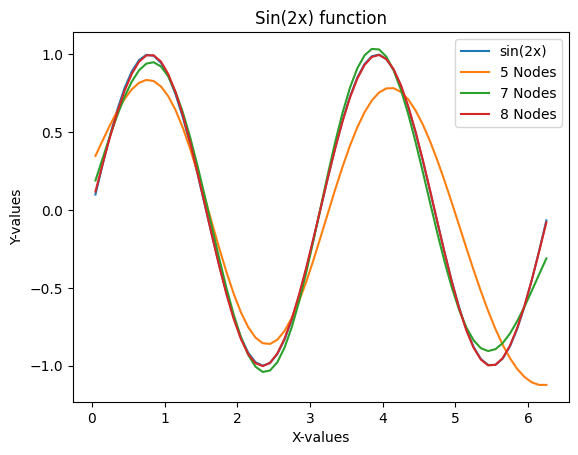

In [141]:

plt.plot(x_data_test,y_data_sin_test, label = "sin(2x)")
plt.plot(x_data_test, pre_sin[n_1-1], label = str(n_1) + " Nodes" )
plt.plot(x_data_test, pre_sin[n_01-1], label = str(n_01) + " Nodes" )
plt.plot(x_data_test, pre_sin[n_001-1], label = str(n_001) + " Nodes" )
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.title("Sin(2x) function")
plt.legend()
plt.show()

In [142]:
errors_s, pre_s =generate_pre(x_data, y_data_square,x_data_test,y_data_square_test)
n_1_s, n_01_s , n_001_s, _ = threshold_node(errors_s)

mini_index = np.argmin(errors_s)
print("The error is below 0.1 when the nodes is : " + str(n_1_s))
print("The error is below 0.01 when the nodes is : " + str(n_01_s))
print("The error is below 0.001 when the nodes is : " + str(n_001_s))
print("The minimun error is the nodes is : " + str(mini_index+1))

The error is below 0.1 when the nodes is : inf
The error is below 0.01 when the nodes is : inf
The error is below 0.001 when the nodes is : inf
The minimun error is the nodes is : 15


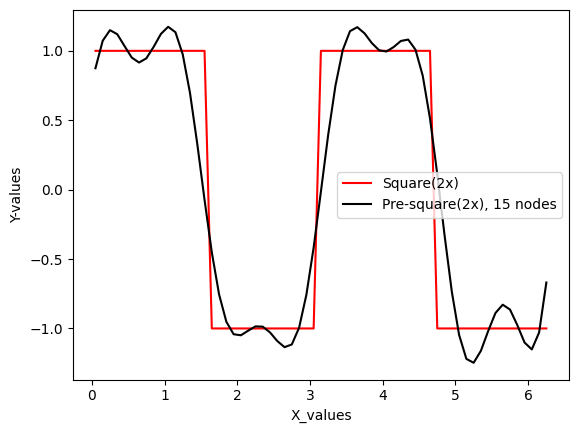

In [143]:
plt.plot(x_data_test , y_data_square_test, color = "red" , label="Square(2x)")
plt.plot(x_data_test ,  pre_s[mini_index], color="black",label="Pre-square(2x), " + str(mini_index+1) +  " nodes")
plt.xlabel("X_values")
plt.ylabel("Y-values")
plt.legend()
plt.show()

In [144]:
pre_z, errors_z= transform(pre_s)
n_1_z, n_01_z, n_001_z , n_zero = threshold_node(errors_z)


print("The error is below 0.1 when the nodes is : " + str(n_1_z))
print("The error is below 0.01 when the nodes is : " + str(n_01_z))
print("The error is below 0.001 when the nodes is : " + str(n_001_z))
print("The error is 0 when the nodes is : " + str(n_zero))

The error is below 0.1 when the nodes is : 6
The error is below 0.01 when the nodes is : 6
The error is below 0.001 when the nodes is : 6
The error is 0 when the nodes is : 6


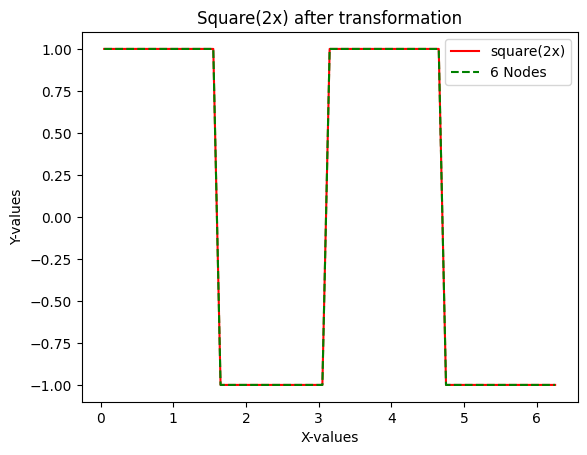

In [145]:
plt.plot(x_data_test, y_data_square_test, label = "square(2x)" , linestyle="solid" ,color="red")
plt.plot(x_data_test, pre_z[n_zero-1], label = str(n_zero) + " Nodes"  , linestyle="dashed", color="green")
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.title("Square(2x) after transformation")
plt.legend()
plt.show()